### Explanation
This code analyse data (i.e, position,growth and fluorescence) from time lapse images of plates with growing colonies expressing different fluorescent proteins (colors)

##### Requirements
 - Image Data


## Analysis


### Loading packages

In [1]:
# import some useful packages to manage the data

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

#we use scikit-image to analyse the images
import skimage 
from skimage import io, filters

In [2]:
import RaspFunction_new as Rsp

### Loading Data

*** it could be reemplaced by loading the data obtained qith the code "Colony size and fluorescence' (or have the option to do that)

In [3]:
fname1 =  "D:\Dropbox\FTI\Raspiscope\Time lapse\TLE_G_7_3_17\image_%04d.jpg"
#refered to drive folder TLE_G_7_3_17

fname2 = "D:\Dropbox\FTI\Raspiscope\Time lapse\TLE_O_10_3_17\image_%04d.jpg"
#refered to drive folder TLE_O_10_3_17

fname3 = "D:\Dropbox\FTI\Raspiscope\Time lapse\TLE_R_13_3_17\image_%04d.jpg"
#refered to drive folder TLE_R_13_3_17

fname4 = "D:\Dropbox\FTI\Raspiscope\Time lapse\TLE_RGO_17_3_17\image_%04d.jpg"
#refered to drive folder TLE_RGO_17_3_17

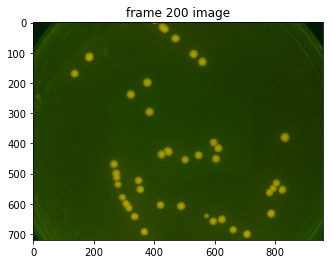

In [4]:
#let's try this with the frame 500 image 
Rsp.plotImFrame(fname2,200)

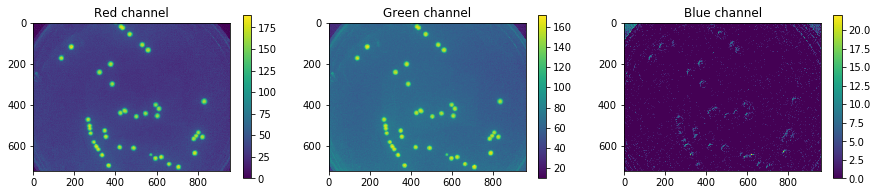

In [5]:
Rsp.pltImFrameChannels(fname2,200)

In [6]:
imCount1=Rsp.count_files('D:\Dropbox\FTI\Raspiscope\Time lapse\TLE_G_7_3_17',"jpg")
imCount2=Rsp.count_files('D:\Dropbox\FTI\Raspiscope\Time lapse\TLE_O_10_3_17',"jpg")
imCount3=Rsp.count_files('D:\Dropbox\FTI\Raspiscope\Time lapse\TLE_R_13_3_17',"jpg")
imCount4=Rsp.count_files('D:\Dropbox\FTI\Raspiscope\Time lapse\TLE_RGO_17_3_17',"jpg")

TLE_G_7_3_17 = 400 files
TLE_O_10_3_17 = 210 files
TLE_R_13_3_17 = 206 files
TLE_RGO_17_3_17 = 210 files


In [7]:
DataS1={}
frames1 = 10   # use one image every 10 frames
DataS1['R'],DataS1['G'],DataS1['B']=Rsp.get_im_data(frames1,imCount1,fname1)
DataS1['Im']=fname1     # to store the related image source

In [8]:
DataS2={}
frames2 = 5
DataS2['R'],DataS2['G'],DataS2['B']=Rsp.get_im_data(frames2,imCount2,fname2)
DataS2['Im']=fname2

In [9]:
DataS3={}
frames3 = 5
DataS3['R'],DataS3['G'],DataS3['B']=Rsp.get_im_data(frames3,imCount3,fname3) 
DataS3['Im']=fname3

In [10]:
DataS4={}
frames4 = 5
DataS4['R'],DataS4['G'],DataS4['B']=Rsp.get_im_data(frames4,imCount4,fname4)
DataS4['Im']=fname4

Now we have each data serie on a dictionary, organized in arrays for each channel.

### Background subtraction
First step is to identify a good background area and compute his value over time:

D:\Dropbox\Tim proyects\RaspiscopeFolders\Raspiscope\RaspFunction_new.py:232: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  plt.hold(True)
C:\Users\Prosimio\Anaconda3\lib\site-packages\matplotlib\__init__.py:917: UserWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  warnings.warn(self.msg_depr_set % key)
C:\Users\Prosimio\Anaconda3\lib\site-packages\matplotlib\rcsetup.py:152: UserWarning: axes.hold is deprecated, will be removed in 3.0
  warnings.warn("axes.hold is deprecated, will be removed in 3.0")


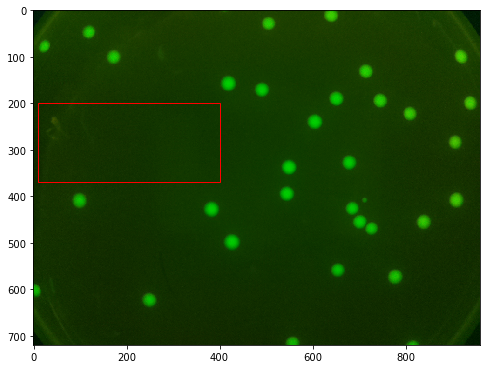

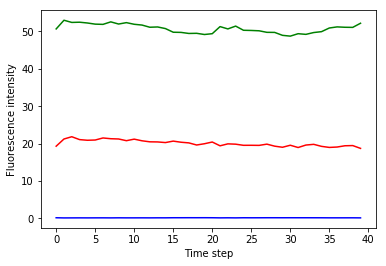

In [12]:
BG1=Rsp.BG_Val(200,370,10,400,DataS1,imCount1)

D:\Dropbox\Tim proyects\RaspiscopeFolders\Raspiscope\RaspFunction_new.py:232: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  plt.hold(True)
C:\Users\Prosimio\Anaconda3\lib\site-packages\matplotlib\__init__.py:917: UserWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  warnings.warn(self.msg_depr_set % key)
C:\Users\Prosimio\Anaconda3\lib\site-packages\matplotlib\rcsetup.py:152: UserWarning: axes.hold is deprecated, will be removed in 3.0
  warnings.warn("axes.hold is deprecated, will be removed in 3.0")


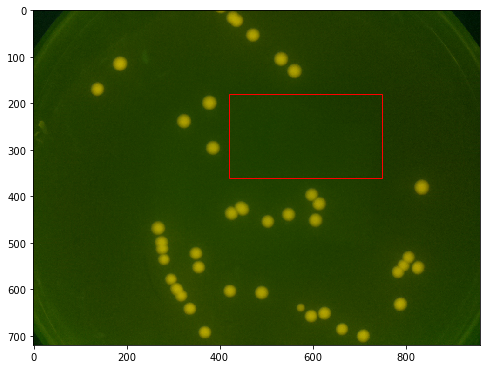

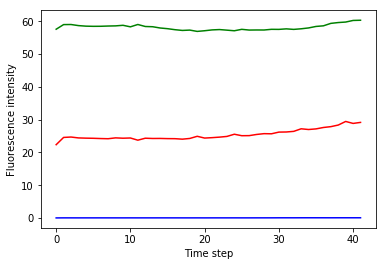

In [15]:
BG2=Rsp.BG_Val(180,360,420,750,DataS2,imCount2)

D:\Dropbox\Tim proyects\RaspiscopeFolders\Raspiscope\RaspFunction_new.py:232: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  plt.hold(True)
C:\Users\Prosimio\Anaconda3\lib\site-packages\matplotlib\__init__.py:917: UserWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  warnings.warn(self.msg_depr_set % key)
C:\Users\Prosimio\Anaconda3\lib\site-packages\matplotlib\rcsetup.py:152: UserWarning: axes.hold is deprecated, will be removed in 3.0
  warnings.warn("axes.hold is deprecated, will be removed in 3.0")


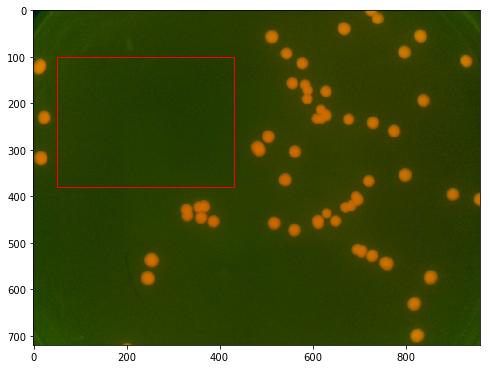

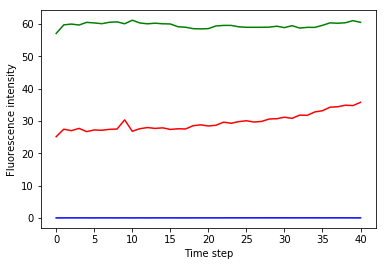

In [18]:
BG3=Rsp.BG_Val(100,380,50,430,DataS3,imCount3)

D:\Dropbox\Tim proyects\RaspiscopeFolders\Raspiscope\RaspFunction_new.py:232: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  plt.hold(True)
C:\Users\Prosimio\Anaconda3\lib\site-packages\matplotlib\__init__.py:917: UserWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  warnings.warn(self.msg_depr_set % key)
C:\Users\Prosimio\Anaconda3\lib\site-packages\matplotlib\rcsetup.py:152: UserWarning: axes.hold is deprecated, will be removed in 3.0
  warnings.warn("axes.hold is deprecated, will be removed in 3.0")


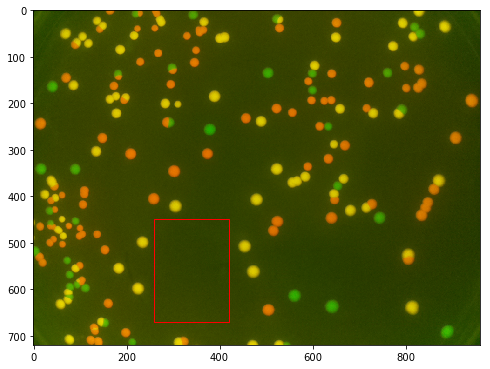

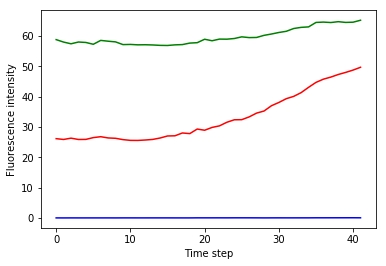

In [22]:
BG4=Rsp.BG_Val(450,670,260,420,DataS4,imCount4)

we can substract that vector value to each frame on the image to eliminate the background effect

In [23]:
DataSB1=Rsp.BG_subst(DataS1,BG1)

In [24]:
DataSB2=Rsp.BG_subst(DataS2,BG2)

In [25]:
DataSB3=Rsp.BG_subst(DataS3,BG3)

In [26]:
DataSB4=Rsp.BG_subst(DataS4,BG4)

### Get colony position
a good way to identify where colonies are situated is by sum the value of each pixel for all the channels and all the frames

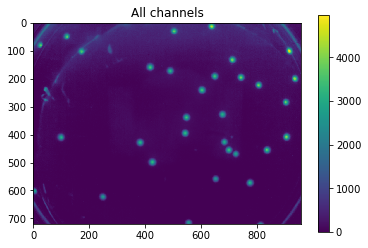

In [28]:
SumData1=Rsp.dataOT(DataSB1)

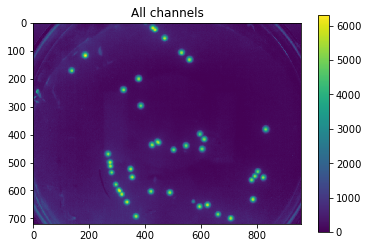

In [29]:
SumData2=Rsp.dataOT(DataSB2)

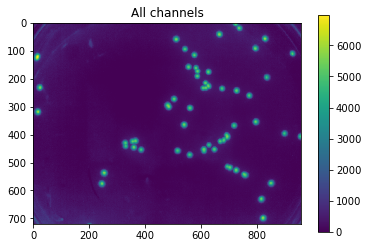

In [30]:
SumData3=Rsp.dataOT(DataSB3)

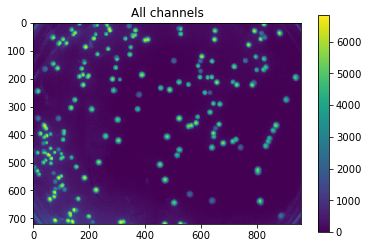

In [31]:
SumData4=Rsp.dataOT(DataSB4)

####  apply a filter to smooth the data (reduce noise and improve border detection)

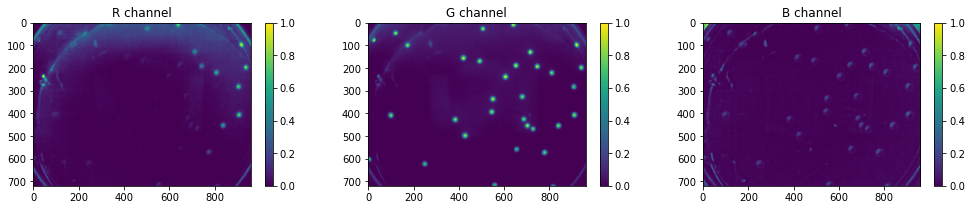

In [32]:
sDatS1,sDatSall1=Rsp.smoothDat(DataSB1,1.5)

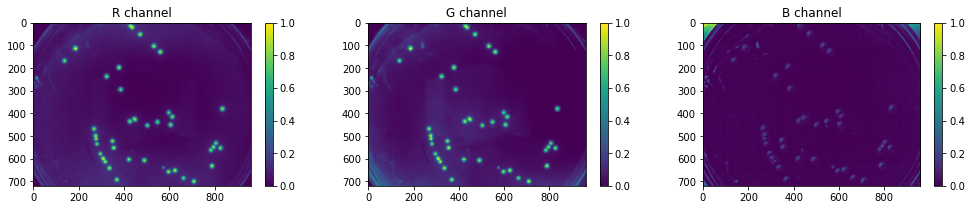

In [33]:
sDatS2,sDatSall2=Rsp.smoothDat(DataSB2,1.5)

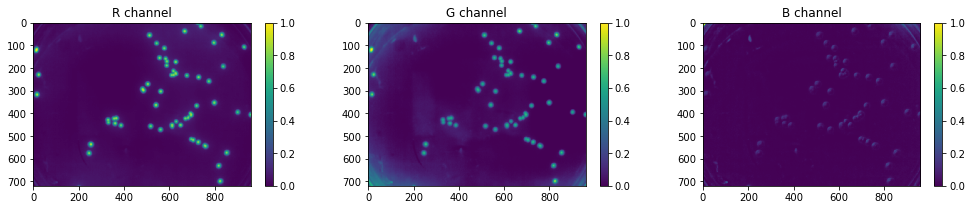

In [35]:
sDatS3,sDatSall3=Rsp.smoothDat(DataSB3,1.5)

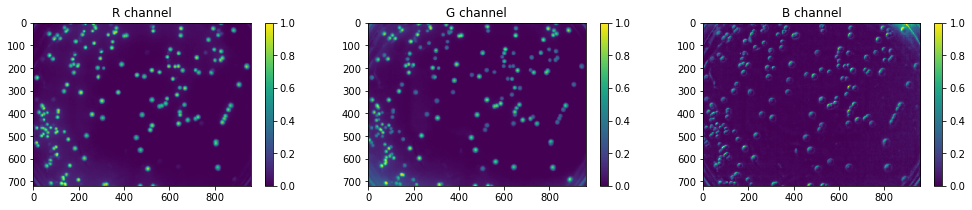

In [36]:
sDatS4,sDatSall4=Rsp.smoothDat(DataSB4,1.5)

### Blob detection

D:\Dropbox\Tim proyects\RaspiscopeFolders\Raspiscope\RaspFunction_new.py:384: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  plt.hold(True)
C:\Users\Prosimio\Anaconda3\lib\site-packages\matplotlib\__init__.py:917: UserWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  warnings.warn(self.msg_depr_set % key)
C:\Users\Prosimio\Anaconda3\lib\site-packages\matplotlib\rcsetup.py:152: UserWarning: axes.hold is deprecated, will be removed in 3.0
  warnings.warn("axes.hold is deprecated, will be removed in 3.0")
D:\Dropbox\Tim proyects\RaspiscopeFolders\Raspiscope\RaspFunction_new.py:394: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
 

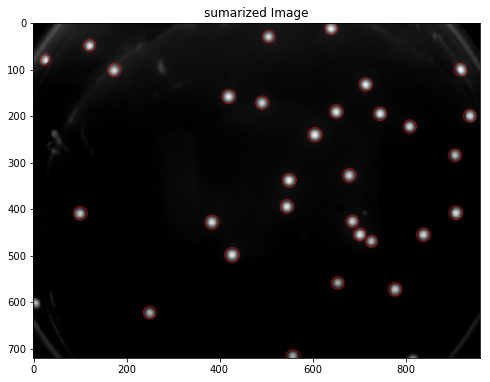

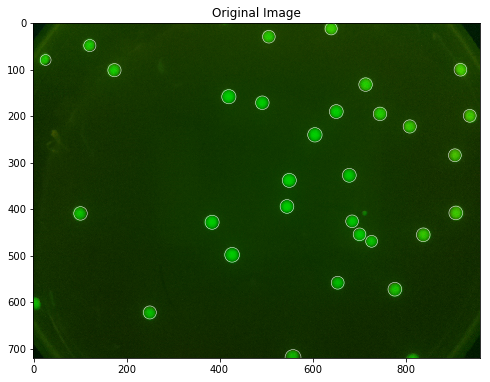

In [45]:
blobD1 = Rsp.colonyBlob(sDatS1['G'],0.35,DataS1['Im']%(imCount1-1)) #for green it was better to use only the green channel

D:\Dropbox\Tim proyects\RaspiscopeFolders\Raspiscope\RaspFunction_new.py:384: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  plt.hold(True)
C:\Users\Prosimio\Anaconda3\lib\site-packages\matplotlib\__init__.py:917: UserWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  warnings.warn(self.msg_depr_set % key)
C:\Users\Prosimio\Anaconda3\lib\site-packages\matplotlib\rcsetup.py:152: UserWarning: axes.hold is deprecated, will be removed in 3.0
  warnings.warn("axes.hold is deprecated, will be removed in 3.0")
D:\Dropbox\Tim proyects\RaspiscopeFolders\Raspiscope\RaspFunction_new.py:394: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
 

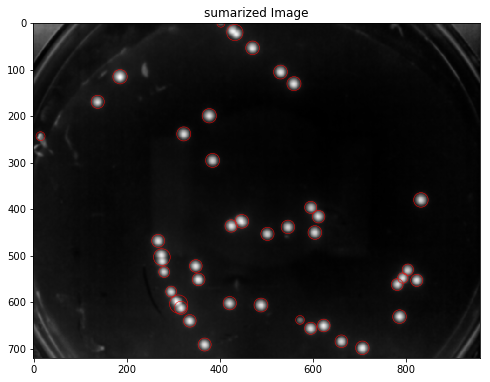

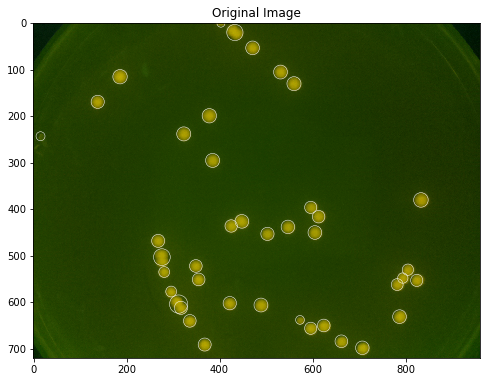

In [54]:
blobD2 = Rsp.colonyBlob(sDatSall2,0.34,DataS2['Im']%(imCount2-1))

D:\Dropbox\Tim proyects\RaspiscopeFolders\Raspiscope\RaspFunction_new.py:384: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  plt.hold(True)
C:\Users\Prosimio\Anaconda3\lib\site-packages\matplotlib\__init__.py:917: UserWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  warnings.warn(self.msg_depr_set % key)
C:\Users\Prosimio\Anaconda3\lib\site-packages\matplotlib\rcsetup.py:152: UserWarning: axes.hold is deprecated, will be removed in 3.0
  warnings.warn("axes.hold is deprecated, will be removed in 3.0")
D:\Dropbox\Tim proyects\RaspiscopeFolders\Raspiscope\RaspFunction_new.py:394: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
 

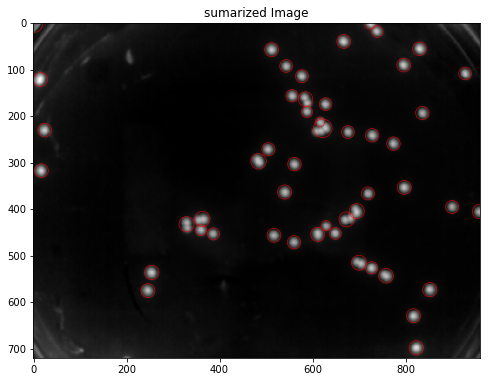

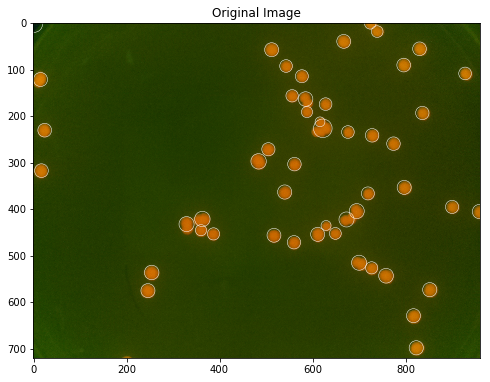

In [57]:
blobD3 = Rsp.colonyBlob(sDatSall3,0.34,DataS3['Im']%(imCount3-1))

D:\Dropbox\Tim proyects\RaspiscopeFolders\Raspiscope\RaspFunction_new.py:384: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  plt.hold(True)
C:\Users\Prosimio\Anaconda3\lib\site-packages\matplotlib\__init__.py:917: UserWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  warnings.warn(self.msg_depr_set % key)
C:\Users\Prosimio\Anaconda3\lib\site-packages\matplotlib\rcsetup.py:152: UserWarning: axes.hold is deprecated, will be removed in 3.0
  warnings.warn("axes.hold is deprecated, will be removed in 3.0")
D:\Dropbox\Tim proyects\RaspiscopeFolders\Raspiscope\RaspFunction_new.py:394: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
 

(159, 3)

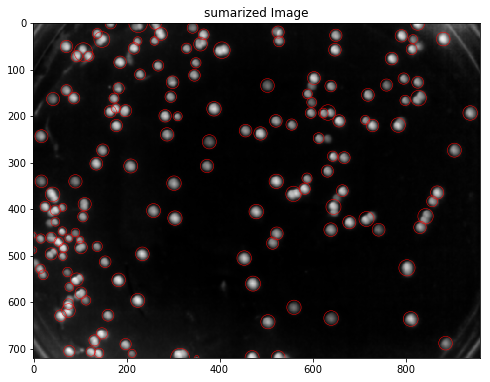

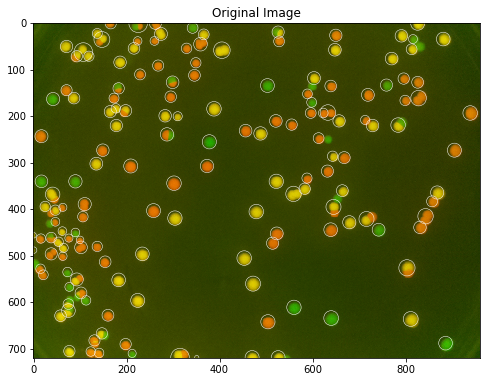

In [68]:
blobD4 = Rsp.colonyBlob(sDatSall4,0.37,DataS4['Im']%(imCount4-1))
blobD4.shape

In [71]:
Rois1,RoisC1,NC1 = Rsp.obtain_rois(DataSB1,blobD1)
Rois2,RoisC2,NC2 = Rsp.obtain_rois(DataSB2,blobD2)
Rois3,RoisC3,NC3 = Rsp.obtain_rois(DataSB3,blobD3)
Rois4,RoisC4,NC4 = Rsp.obtain_rois(DataSB4,blobD4)

D:\Dropbox\Tim proyects\RaspiscopeFolders\Raspiscope\RaspFunction_new.py:466: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  rois[i] = data[char][x1:x2,y1:y2,:]


## ROIS Color Analysis

In [93]:
def rois_last_plot(data,Channel1,Channel2,Fname):
    #plt.figure(figsize=(8,8))
    chanx=np.zeros((len(data[Channel1]),1))
    chany=np.zeros((len(data[Channel1]),1))
    for i in range(len(data[Channel1])):
        chanx[i]=data[Channel1][i][:,:,-1].sum(axis=(0,1))
        chany[i]=data[Channel2][i][:,:,-1].sum(axis=(0,1))
    axisMax=np.max([np.max(chanx),np.max(chany)])
    
    axisMin=np.min([np.min(chanx),np.min(chany)])
    #print(axisMax,axisMin)
    plt.plot(chanx,chany,'bo')
    plt.title(Fname)
    plt.xlabel(Channel1+' Channel')
    plt.ylabel(Channel2+' Channel')
    plt.axis([axisMin, axisMax, axisMin, axisMax])
    return(chanx,chany)

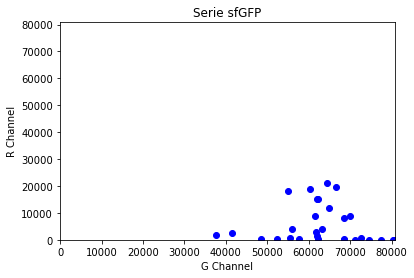

In [187]:
ChanX='G'
ChanY='R'
Xchan1,Ychan1=rois_last_plot(RoisC1,ChanX,ChanY,'Serie sfGFP')

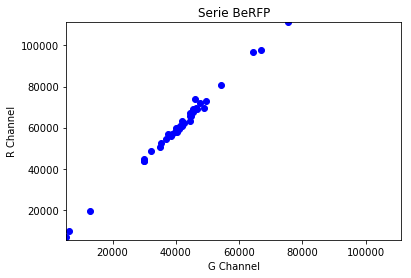

In [188]:
Xchan2,Ychan2=rois_last_plot(RoisC2,ChanX,ChanY,'Serie BeRFP')

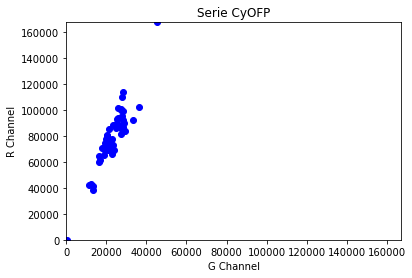

In [189]:
Xchan3,Ychan3=rois_last_plot(RoisC3,ChanX,ChanY,'Serie CyOFP')

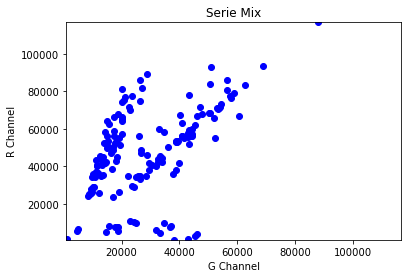

In [190]:
Xchan4,Ychan4=rois_last_plot(RoisC4,ChanX,ChanY,'Serie Mix')

In [191]:
#perform linear fit
def linear_fit(data1,data2):
    z=np.polyfit(data1, data2, 1)
    #print(z)           #first component is the slope
    p = np.poly1d(z)
    print(np.poly1d(p))
    xp = np.linspace(data1.min(), data1.max(), 2)
    #plt.plot(timeC[init:end], ratio[init:end,i], '.', xp, p(xp), '-')
    plt.plot(data1, data2, '.', xp, p(xp), '-')
    plt.show()
    return(z)

In [192]:
from scipy.optimize import curve_fit

In [193]:
def Flinear(x, a, b):
    return(a * x + b)

In [215]:
def linear_fit(data1,data2):
    z,_=curve_fit(Flinear,data1, data2,bounds=([0,-np.inf], np.inf))
    #print(z)           #first component is the slope
    p = np.poly1d(z)
    print(np.poly1d(p))
    xp = np.linspace(data1.min(), data1.max(), 2)
    #plt.plot(timeC[init:end], ratio[init:end,i], '.', xp, p(xp), '-')
    axisMax=np.max([np.max(data1),np.max(data2)])
    axisMin=np.min([np.min(data1),np.min(data2)])
    plt.axis([axisMin, axisMax, axisMin, axisMax])
    plt.plot(data1, data2, '.', xp, p(xp), '-')
    plt.show()
    return(z)

 
5.359e-15 x + 5513


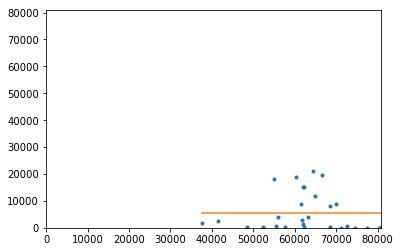

In [216]:
fit1=linear_fit(Xchan1[:,0],Ychan1[:,0])

 
1.484 x - 198.2


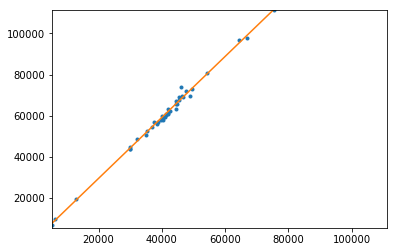

In [217]:
fit2=linear_fit(Xchan2[:,0],Ychan2[:,0])

 
3.184 x + 6039


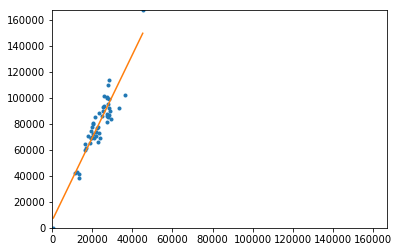

In [218]:
fit3=linear_fit(Xchan3[:,0],Ychan3[:,0])

In [223]:
def colony_clasificator(Fit1,Fit2,Fit3,clases,chanx,chany): 
    #y=np.zeros((len(chanx),3))
    y=np.zeros(3)
    d=np.zeros(3)
    clas=np.zeros(len(chanx))
    NClas={}
    
    for i in range(len(chanx)):
        y[0]=Fit1[0]*chanx[i]+Fit1[1]
        y[1]=Fit2[0]*chanx[i]+Fit2[1]
        y[2]=Fit3[0]*chanx[i]+Fit3[1]
        
        for j in range(len(y)):
            d[j]=(y[j]-chany[i])*(y[j]-chany[i])
        
        mindif=np.min(d)
        
        if mindif == d[0]:
            clas[i]=0
            
        elif mindif == d[1]:
            clas[i]=1
            
        elif mindif == d[2]:
            clas[i]=2
    
    for n in range(len(clases)):
        NClas[clases[n]]=[chanx[clas==n],chany[clas==n],clas==n]
    #clas[clases[2]][q]=[chanx[i],chany[i]]
    return(clas,NClas)

In [224]:
ClasS4,NClasS4=colony_clasificator(fit1,fit2,fit3,['GFP','CyOFP','BeRFP'],Xchan4,Ychan4) 

In [226]:
NClasS4

{'BeRFP': [array([[  9253.26855114],
         [ 13586.66670455],
         [ 19087.07105114],
         [  9833.92286932],
         [ 10403.2109375 ],
         [ 16505.05457386],
         [ 26487.91982955],
         [ 11859.11732955],
         [ 11244.41568182],
         [ 13528.57309659],
         [ 13354.520625  ],
         [ 14917.50519886],
         [ 14363.62556818],
         [ 17018.26446023],
         [ 13434.03400568],
         [ 18211.57309659],
         [ 10840.07514205],
         [ 17278.36426136],
         [ 12598.80355114],
         [ 13769.19036932],
         [ 28752.75318182],
         [ 11611.30045455],
         [ 21302.99392045],
         [ 11521.23255682],
         [  9913.72431818],
         [ 27240.55357955],
         [  9318.2109375 ],
         [ 14860.65747159],
         [ 11288.40025568],
         [ 14430.54224432],
         [ 22790.28607955],
         [ 11347.41053977],
         [ 17376.00829545],
         [ 22594.81488636],
         [ 15419.43730114],
         [ 

C:\Users\Prosimio\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  from ipykernel import kernelapp as app
C:\Users\Prosimio\Anaconda3\lib\site-packages\matplotlib\__init__.py:917: UserWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  warnings.warn(self.msg_depr_set % key)
C:\Users\Prosimio\Anaconda3\lib\site-packages\matplotlib\rcsetup.py:152: UserWarning: axes.hold is deprecated, will be removed in 3.0
  warnings.warn("axes.hold is deprecated, will be removed in 3.0")


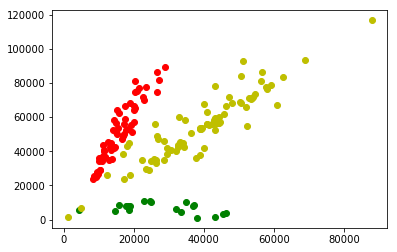

In [222]:
plt.plot(NClasS4['GFP'][0],NClasS4['GFP'][1],'go')
plt.hold(True)
plt.plot(NClasS4['CyOFP'][0],NClasS4['CyOFP'][1],'yo')
plt.plot(NClasS4['BeRFP'][0],NClasS4['BeRFP'][1],'ro')